# 言語処理100本ノック 2015 Chapter 3

[言語処理100本ノック 2015][nlp100] を練習します。
ここでは、 "Chapter 4 形態素解析" を実施します。

[nlp100]: http://www.cl.ecei.tohoku.ac.jp/nlp100/

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt][neko]）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib][matplotlib]もしくは[Gnuplot][gnuplot]を用いるとよい．

[gnuplot]: http://www.gnuplot.info/
[matplotlib]: http://matplotlib.org/
[neko]: http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt

## 準備

### 対象テキストのダウンロード

In [1]:
import pathlib


FILENAME = 'neko.txt'


def download_neko() -> None:
    if (pathlib.Path(FILENAME).exists() == False):
        !wget http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt -O $FILENAME


download_neko()
!cat $FILENAME | head -n 5

一

　吾輩は猫である。
名前はまだ無い。



### Mecab のインストール

In [2]:
!apt install -y \
    curl \
    file \
    git \
    libmecab-dev \
    make \
    mecab \
    mecab-ipadic-utf8 \
    swig \
    xz-utils
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.1-9.1ubuntu1).
xz-utils is already the newest version (5.2.2-1.3).
libmecab-dev is already the newest version (0.996-5).
mecab is already the newest version (0.996-5).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
swig is already the newest version (3.0.12-1).
curl is already the newest version (7.58.0-2ubuntu3.5).
file is already the newest version (1:5.32-2ubuntu0.1).
git is already the newest version (1:2.17.1-1ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


### Mecab による形態素解析

In [3]:
import MeCab


FILENAME_MECAB = 'neko.txt.mecab'


def output_mecab() -> None:
    with open(FILENAME) as f:
        buff = f.read()

    tagger = MeCab.Tagger()
    parsed = tagger.parse(buff)

    with open (FILENAME_MECAB, 'w') as f:
        f.write(parsed)


output_mecab()
!cat $FILENAME_MECAB | head -n 20

一	名詞,数,*,*,*,*,一,イチ,イチ
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント


## 30. 形態素解析結果の読み込み

> 形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
from IPython.display import display
import pandas as pd
from typing import List


def problem030() -> List[pd.DataFrame]:
    with open(FILENAME_MECAB) as f:
        buff = []
        line = 0
        for word in f.readlines():
            data = word.split('\t')
            if (len(data) < 2):
                break
            types = data[1].split(',')

            buff.append({
                'line': line,
                'surface': data[0],
                'base': types[6],
                'pos': types[0],
                'pos1': types[1],
            })
            if data[0] == '。':
                line += 1

    df = pd.DataFrame(buff)
    return df


df_neko = problem030()
display(df_neko.head())

,base,line,pos,pos1,surface
0,一,0,名詞,数,一
1,,0,記号,空白,
2,吾輩,0,名詞,代名詞,吾輩
3,は,0,助詞,係助詞,は
4,猫,0,名詞,一般,猫


## 31. 動詞

> 動詞の表層形をすべて抽出せよ．

In [5]:
import pandas as pd
from pprint import pprint


def problem031() -> None:
    df = df_neko[df_neko.pos == '動詞']
    arr = df['surface'].unique().tolist()
    pprint(arr)


problem031()

['生れ',
 'つか',
 'し',
 '泣い',
 'いる',
 '始め',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'あっ',
 '落ちつい',
 '思っ',
 '残っ',
 'さ',
 'れ',
 '逢っ',
 '出会わ',
 'なら',
 '吹く',
 'せ',
 '弱っ',
 '飲む',
 '知っ',
 '坐っ',
 'おっ',
 'する',
 '動く',
 '分ら',
 '廻る',
 'なる',
 '助から',
 'さり',
 '出',
 '考え出そ',
 '付い',
 '見る',
 'い',
 '見え',
 '隠し',
 'しまっ',
 '違っ',
 '明い',
 '這い出し',
 '棄て',
 '這い出す',
 'ある',
 '考え',
 '来',
 'くれる',
 '考え付い',
 'やっ',
 '渡っ',
 'かかる',
 '減っ',
 '泣き',
 'そろ',
 '廻り',
 '這っ',
 '行く',
 '這入っ',
 '崩れ',
 'もぐり込ん',
 '破れ',
 '知れ',
 '云っ',
 '至る',
 'なっ',
 '忍び込ん',
 '減る',
 '降っ',
 '来る',
 '出来',
 'あるい',
 '考える',
 'つかん',
 '抛り出し',
 'ねぶっ',
 '任せ',
 '這い',
 '上っ',
 '投げ出さ',
 '上り',
 '繰り返し',
 '云う',
 '下り',
 'つまみ出さ',
 'れよ',
 'いい',
 'ぶら下げ',
 '向け',
 '出し',
 '困り',
 'いう',
 '撚り',
 '眺め',
 '置い',
 'やれ',
 '聞か',
 '極める',
 '合せる',
 '帰る',
 '見せ',
 '覗い',
 '読みかけ',
 'たらし',
 '帯び',
 'あらわし',
 '食っ',
 '飲ん',
 'ひろげる',
 '読む',
 '垂らす',
 '繰り返す',
 '限る',
 '寝',
 '勤まる',
 '云わ',
 'せる',
 '鳴らし',
 '住み込ん',
 '行っ',
 '跳ね',
 '付け',
 'くれ',
 'つけ',
 '分る',
 '得る',
 '入れ',
 'つとめ',
 '乗る',
 '構

## 32. 動詞の原形

> 動詞の原形をすべて抽出せよ．

In [6]:
import pandas as pd
from pprint import pprint


def problem032() -> None:
    df = df_neko[df_neko.pos == '動詞']
    arr = df['base'].unique().tolist()
    pprint(arr)


problem031()

['生れ',
 'つか',
 'し',
 '泣い',
 'いる',
 '始め',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'あっ',
 '落ちつい',
 '思っ',
 '残っ',
 'さ',
 'れ',
 '逢っ',
 '出会わ',
 'なら',
 '吹く',
 'せ',
 '弱っ',
 '飲む',
 '知っ',
 '坐っ',
 'おっ',
 'する',
 '動く',
 '分ら',
 '廻る',
 'なる',
 '助から',
 'さり',
 '出',
 '考え出そ',
 '付い',
 '見る',
 'い',
 '見え',
 '隠し',
 'しまっ',
 '違っ',
 '明い',
 '這い出し',
 '棄て',
 '這い出す',
 'ある',
 '考え',
 '来',
 'くれる',
 '考え付い',
 'やっ',
 '渡っ',
 'かかる',
 '減っ',
 '泣き',
 'そろ',
 '廻り',
 '這っ',
 '行く',
 '這入っ',
 '崩れ',
 'もぐり込ん',
 '破れ',
 '知れ',
 '云っ',
 '至る',
 'なっ',
 '忍び込ん',
 '減る',
 '降っ',
 '来る',
 '出来',
 'あるい',
 '考える',
 'つかん',
 '抛り出し',
 'ねぶっ',
 '任せ',
 '這い',
 '上っ',
 '投げ出さ',
 '上り',
 '繰り返し',
 '云う',
 '下り',
 'つまみ出さ',
 'れよ',
 'いい',
 'ぶら下げ',
 '向け',
 '出し',
 '困り',
 'いう',
 '撚り',
 '眺め',
 '置い',
 'やれ',
 '聞か',
 '極める',
 '合せる',
 '帰る',
 '見せ',
 '覗い',
 '読みかけ',
 'たらし',
 '帯び',
 'あらわし',
 '食っ',
 '飲ん',
 'ひろげる',
 '読む',
 '垂らす',
 '繰り返す',
 '限る',
 '寝',
 '勤まる',
 '云わ',
 'せる',
 '鳴らし',
 '住み込ん',
 '行っ',
 '跳ね',
 '付け',
 'くれ',
 'つけ',
 '分る',
 '得る',
 '入れ',
 'つとめ',
 '乗る',
 '構

## 33. サ変名詞

> サ変接続の名詞をすべて抽出せよ．

In [7]:
def problem033() -> None:
    df = df_neko[(df_neko.pos == '名詞') & (df_neko.pos1 == 'サ変接続')]
    display(df)


problem033()

,base,line,pos,pos1,surface
20,見当,2,名詞,サ変接続,見当
39,記憶,3,名詞,サ変接続,記憶
93,話,6,名詞,サ変接続,話
188,装飾,11,名詞,サ変接続,装飾
234,突起,13,名詞,サ変接続,突起
304,運転,17,名詞,サ変接続,運転
360,記憶,21,名詞,サ変接続,記憶
510,分別,31,名詞,サ変接続,分別
600,決心,37,名詞,サ変接続,決心
623,我慢,39,名詞,サ変接続,我慢


## 34. 「AのB」

> 2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [8]:
def problem034() -> None:
    df = df_neko[(df_neko.base == 'の') & (df_neko.pos1 == '連体化')]
    arr = [
        df_neko.iloc[idx - 1].surface
            + row.surface
            + df_neko.iloc[idx + 1].surface
        for idx, row in df.iterrows()
    ]
    pprint(arr[:10])


problem034()

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']


## 35. 名詞の連接

> 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [9]:
def concat_noun(idx: int) -> (str, int):
    if df_neko.iloc[idx].pos != '名詞':
        return '', idx - 1

    buff, end_idx = concat_noun(idx + 1)
    return (df_neko.iloc[idx].surface + buff), end_idx


def problem035() -> None:
    df = df_neko[df_neko.pos == '名詞']
    arr = []
    end_idx = -1
    for idx, _ in df.iterrows():
        if end_idx >= idx:
            continue

        buff, end_idx = concat_noun(idx)
        arr.append(buff)

    pprint(arr)


problem035()

['一',
 '吾輩',
 '猫',
 '名前',
 'どこ',
 '見当',
 '何',
 '所',
 'ニャーニャー',
 'いた事',
 '記憶',
 '吾輩',
 'ここ',
 '人間',
 'もの',
 'あと',
 'それ',
 '書生',
 '人間中',
 '一番獰悪',
 '種族',
 'そう',
 '書生',
 'の',
 '我々',
 '話',
 '当時',
 '何',
 '考',
 '彼',
 '掌',
 'スー',
 '時',
 '感じ',
 '掌',
 '上',
 '書生',
 '顔',
 'の',
 '人間',
 'もの',
 '始',
 '時妙',
 'もの',
 '感じ',
 '今',
 '一毛',
 '装飾',
 'はず',
 '顔',
 '薬缶',
 'その後猫',
 '輪',
 '一度',
 '事',
 '顔',
 '真中',
 '突起',
 '穴',
 '中',
 'ぷうぷうと煙',
 '咽',
 'これ',
 '人間',
 '煙草',
 'もの',
 '事',
 '頃',
 '書生',
 '掌',
 '裏',
 '心持',
 '非常',
 '速力',
 '運転',
 '書生',
 'の',
 '自分',
 'の',
 '眼',
 '胸',
 '音',
 '眼',
 '火',
 'それ',
 '記憶',
 'あと',
 '何',
 '事',
 '気',
 '書生',
 'たくさん',
 '兄弟',
 '一疋',
 '肝心',
 '母親',
 '姿',
 '上今',
 '所',
 '眼',
 '何',
 '容子',
 '非常',
 '吾輩',
 '藁',
 '上',
 '急',
 '笹原',
 '中',
 'の',
 '思い',
 '笹原',
 '向う',
 '池',
 '吾輩',
 '池',
 '前',
 'これ',
 '分別',
 '書生',
 '迎',
 'ニャー',
 'ニャー',
 '試み',
 '誰',
 '池',
 '上',
 '風',
 '日',
 '暮れ',
 '腹',
 '非常',
 '声',
 '仕方',
 '何',
 '食物',
 '所',
 '決心',
 '池',
 '左',
 '非常',
 'そこ',
 '我慢',
 '無理やり',
 '事',
 '人間',
 '所',
 'ここ',
 '竹垣',
 

## 36. 単語の出現頻度

> 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [10]:
def problem036() -> None:
    df = df_neko['surface'].value_counts()
    pprint(df)


problem036()

の        9194
。        7486
て        6873
、        6772
は        6422
に        6268
を        6071
と        5515
が        5339
た        3989
で        3813
「        3231
」        3225
も        2479
ない       2391
だ        2367
し        2328
から       2043
ある       1730
な        1612
ん        1568
か        1531
いる       1251
事        1207
へ        1034
する        998
う         992
もの        981
君         973
です        973
         ... 
無惨          1
剥げ          1
遂行          1
ゆっくり        1
寝ころん        1
詩吟          1
暑苦しい        1
潰れる         1
梢           1
呼び立て        1
昨年          1
そそのかし       1
同君          1
常磐          1
かたい         1
毎回          1
蚤           1
要心          1
満腹          1
待った         1
肩書          1
周密          1
志す          1
多感          1
色男          1
加勢          1
越中褌         1
生れ変っ        1
焦慮          1
痛痒          1
Name: surface, Length: 13590, dtype: int64


## 37. 頻度上位10語

> 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

の    9194
。    7486
て    6873
、    6772
は    6422
に    6268
を    6071
と    5515
が    5339
た    3989
Name: surface, dtype: int64

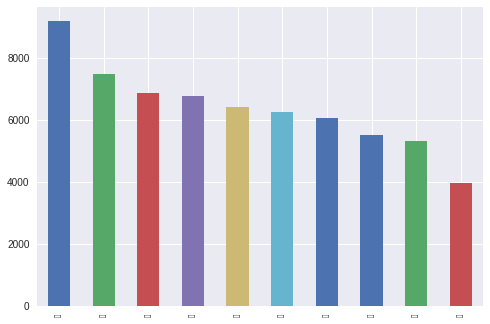

In [11]:
import seaborn as sns


def problem037() -> None:
    df = df_neko['surface'].value_counts()
    display(df[:10].T)
    df.iloc[:10].plot.bar()


problem037()

## 38. ヒストグラム

> 単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


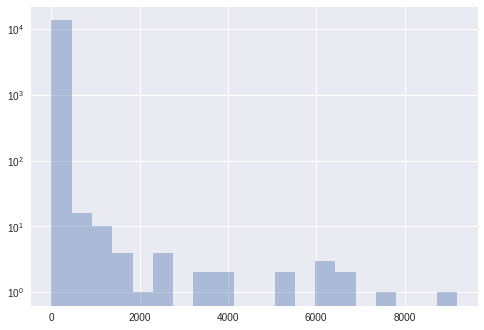

In [12]:
def problem038() -> None:
    x = df_neko['surface'].value_counts().tolist()
    ax = sns.distplot(x, kde=False, rug=False, bins=20) 
    ax.set_yscale('log')


problem038()

## 39. Zipfの法則

> 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

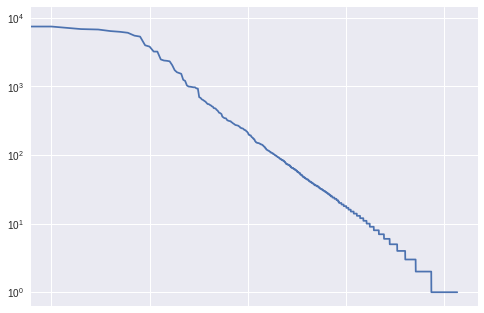

In [13]:
def problem039() -> None:
    df = df_neko['surface'].value_counts()
    df.plot(logx=True, logy=True)


problem039()